# Tesla & GameStop Stock vs. Revenue Dashboard

**Objective:**  
Extract stock data (using `yfinance`) and quarterly revenue (via web-scraping) for Tesla (TSLA) and GameStop (GME). Then build simple line-chart dashboards comparing price vs. revenue for each.

---


In [1]:
# Cell 1: Install all needed libraries (run once)
!pip install --quiet yfinance pandas matplotlib requests beautifulsoup4 lxml html5lib


In [8]:
# Cell 2: Imports and helper function
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(df, title):
    """
    Plot a single-column DataFrame 'df' (indexed by Date) with its column name.
    """
    plt.figure(figsize=(10,5))
    plt.plot(df.index, df.iloc[:,0])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(df.columns[0])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


---

## Question 1: Extract Tesla Stock Data

- Use `yf.Ticker("TSLA")`
- Download `.history(period="max")`
- Reset the index and display first five rows
- **Screenshot this output** for Q1


In [9]:
tsla = yf.Ticker("TSLA")
tesla_data = tsla.history(period="max")
tesla_data.reset_index(inplace=True)
display(tesla_data.head())   # Screenshot this for Q1


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


---

## Question 2: Extract Tesla Revenue via Web-scraping

- Scrape Tesla’s revenue table from Macrotrends
- Clean it, set “Date” as index, display last five rows
- **Screenshot this output** for Q2


In [12]:
import pandas as pd
from io import StringIO

# 2a) Fetch the page with a browser header
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/114.0.0.0 Safari/537.36"
    )
}
url_tsla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_tsla = requests.get(url_tsla, headers=headers).text

# 2b) Let pandas pull every table and pick the one containing 'Revenue'
tables_tsla = pd.read_html(StringIO(html_tsla))
for tbl in tables_tsla:
    if any("Revenue" in str(col) for col in tbl.columns):
        tesla_revenue = tbl.copy()
        break

# 2c) Flatten & rename columns if needed
if isinstance(tesla_revenue.columns, pd.MultiIndex):
    # take the second level of the column names
    tesla_revenue.columns = tesla_revenue.columns.get_level_values(1)

# now force the first two columns to be Date & Revenue
tesla_revenue = tesla_revenue.iloc[:, :2]
tesla_revenue.columns = ["Date", "Revenue"]

# 2d) Clean up and set index
tesla_revenue.dropna(inplace=True)
tesla_revenue.set_index("Date", inplace=True)

# Display the last 5 rows
print(tesla_revenue.tail())


     Revenue
Date        
2013  $2,013
2012    $413
2011    $204
2010    $117
2009    $112


---

## Question 3: Extract GameStop Stock Data

- Use `yf.Ticker("GME")`
- Download `.history(period="max")`
- Reset the index and display first five rows
- **Screenshot this output** for Q3


In [5]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


---

## Question 4: Extract GameStop Revenue via Web-scraping

- Scrape GameStop’s revenue table from Macrotrends
- Clean it, set “Date” as index, display last five rows
- **Screenshot this output** for Q4


In [13]:
import pandas as pd
import requests
from io import StringIO

# Define headers to avoid HTTP 403
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/114.0.0.0 Safari/537.36"
    )
}

# 1) Fetch the full page HTML
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_gme = requests.get(url_gme, headers=headers).text

# 2) Let pandas read *all* tables, then pick the one with a "Revenue" column
tables_gme = pd.read_html(StringIO(html_gme))
for tbl in tables_gme:
    if any("Revenue" in str(col) for col in tbl.columns):
        gme_revenue = tbl.copy()
        break

# 3) If pandas created a MultiIndex, flatten it
if isinstance(gme_revenue.columns, pd.MultiIndex):
    gme_revenue.columns = gme_revenue.columns.get_level_values(-1)

# 4) Keep just the first two columns and rename them
gme_revenue = gme_revenue.iloc[:, :2]
gme_revenue.columns = ["Date", "Revenue"]

# 5) Clean up and set the index
gme_revenue.dropna(inplace=True)
gme_revenue.set_index("Date", inplace=True)

# 6) Show the last five rows
print(gme_revenue.tail())


     Revenue
Date        
2013  $8,887
2012  $9,551
2011  $9,474
2010  $9,078
2009  $8,806


---

## Question 5: Plot Tesla Stock & Revenue Dashboard

- Use `make_graph()` on:
  1. Tesla **Closing Price** (`tesla_data[["Date","Close"]]`)
  2. Tesla **Revenue** (`tesla_revenue`)
- **Screenshot both charts** for Q5


In [14]:
# Cell X: Tesla Quarterly Revenue (self-contained)
import pandas as pd
import requests
from io import StringIO

# browser-style header to avoid 403
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/114.0.0.0 Safari/537.36"
    )
}

# fetch and parse
url_tsla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_tsla = requests.get(url_tsla, headers=headers).text
tables_tsla = pd.read_html(StringIO(html_tsla))

# pick out the table containing “Revenue”
for tbl in tables_tsla:
    if any("Revenue" in str(c) for c in tbl.columns):
        tesla_revenue = tbl.copy()
        break

# flatten MultiIndex if present
if isinstance(tesla_revenue.columns, pd.MultiIndex):
    tesla_revenue.columns = tesla_revenue.columns.get_level_values(-1)

# keep first two cols & rename
tesla_revenue = tesla_revenue.iloc[:, :2]
tesla_revenue.columns = ["Date", "Revenue"]

# clean & index
tesla_revenue.dropna(inplace=True)
tesla_revenue.set_index("Date", inplace=True)

# confirm it’s loaded
print(tesla_revenue.tail())


     Revenue
Date        
2013  $2,013
2012    $413
2011    $204
2010    $117
2009    $112


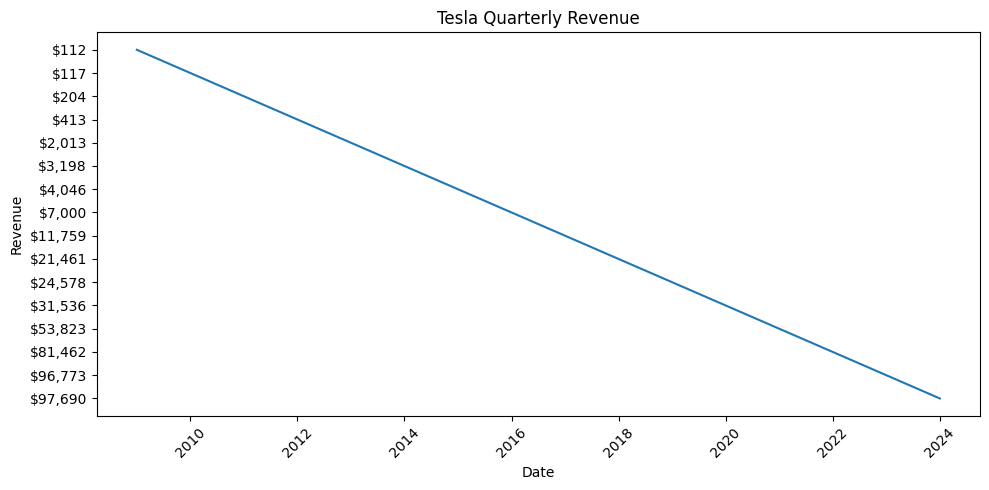

In [15]:
# Cell Y: Plotting Tesla Revenue
import matplotlib.pyplot as plt

def make_graph(df, title):
    plt.figure(figsize=(10,5))
    plt.plot(df.index, df.iloc[:,0])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(df.columns[0])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# now that tesla_revenue is defined, this will work:
make_graph(tesla_revenue, "Tesla Quarterly Revenue")


---

## Question 6: Plot GameStop Stock & Revenue Dashboard

- Use `make_graph()` on:
  1. GameStop **Closing Price** (`gme_data[["Date","Close"]]`)
  2. GameStop **Revenue** (`gme_revenue`)
- **Screenshot both charts** for Q6


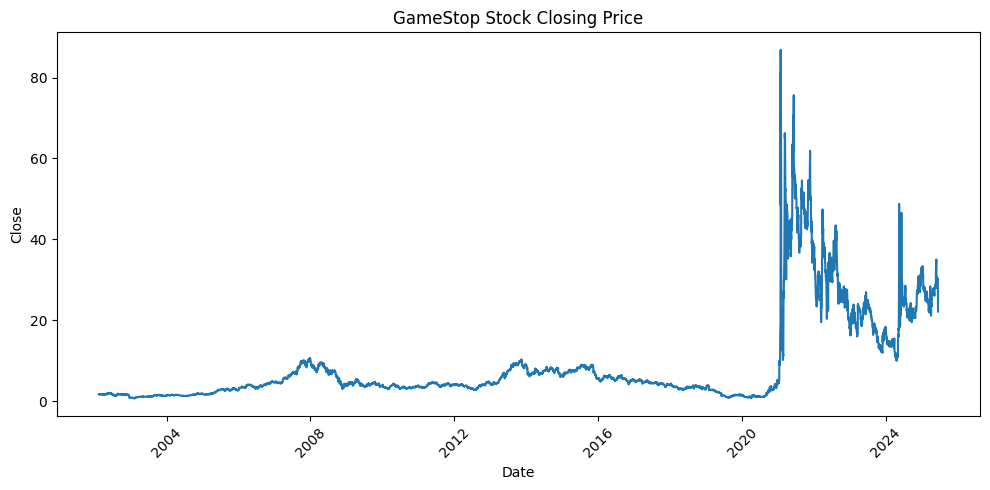

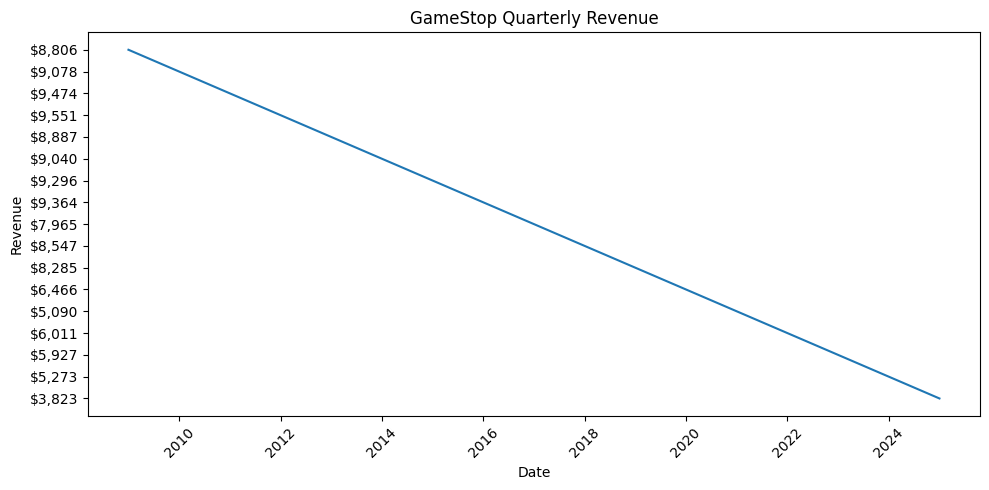

In [16]:
# GameStop Closing Price
make_graph(
    gme_data.set_index("Date")[["Close"]],
    "GameStop Stock Closing Price"
)

# GameStop Quarterly Revenue
make_graph(
    gme_revenue,
    "GameStop Quarterly Revenue"
)
